<a href="https://colab.research.google.com/github/pramudianzaheka92/MachineLearningTimeSeries/blob/master/People_Analytics_BRI_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PENGUJIAN METODE MACHINE LEARNING TIME SERIES UNTUK MENGANALISIS PERFORMA KARYAWAN DALAM 1 TAHUN KE DEPAN DENGAN MENGGUNAKAN DATASET HISTORI KPI**

Langkah 1: Memanggil library python yang ada di google colab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Langkah 2: Import dataset yang telah saya upload dari google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data1 = r'drive/My Drive/BRI Hackathon/train.csv'
data2 = r'drive/My Drive/BRI Hackathon/test.csv'

Mounted at /content/drive


Langkah 3: Mengubah variabel dari data1 dan data2 menjadi data_latih dan data_uji

In [ ]:
data_latih = pd.read_csv(data1)
data_uji = pd.read_csv(data2)

In [ ]:
data_latih.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [ ]:
data_latih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

Hasil keluaran (output) dari train.csv dengan variabel data_latih menghasilkan:
1. Jumlah baris data sebanyak 11153.
2. Terdapat 22 kolom dalam data_latih.
3. Terdapat banyak kolom beserta tipe datanya. Tipe data yang terdapat di dalam data_latih adalah object (string), float dan integer.

Karena pengujian yang dilakukan untuk mencari performa terbaik dari karyawan, maka yang akan saya prediksi adalah kolom tabel Last_achievement_% dan Best Performance. Dari situ, kita akan dapat memprediksi performa karyawan selama 1 tahun ke depan. Namun sebelum itu saya akan melakukan sebuah langkah untuk menghapus beberapa kolom supaya dapat lebih mudah dalam menganalisis data.

In [ ]:
data_latih = data_latih.drop(["job_level", "job_duration_in_current_job_level", "person_level", "job_duration_in_current_person_level", "job_duration_in_current_branch","Employee_type","gender","age", "marital_status_maried(Y/N)", 
                              "number_of_dependences", "Education_level", "GPA", "job_duration_from_training", "branch_rotation", "job_rotation", "assign_of_otherposition", 
                              "annual leave", "sick_leaves"], axis = 1)
data_latih.head()

,year_graduated,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,2011,46.37,0.0,0
1,2007,47.68,0.0,0
2,1989,40.73,0.0,0
3,1987,47.42,0.0,1
4,1985,47.18,0.0,0


## **DATA PREPROCESSING (PEMROSESAN AWAL DATA)**

Yang akan saya lakukan pada langkah ini adalah:
1. Membuat variabel baru dengan nama total_performance sebagai parameter dari perhitungan variabel Best Performance dan Last_achievement_%.

In [ ]:
data_latih["total_performance"] = data_latih["Best Performance"] * data_latih["Last_achievement_%"]
data_latih.head(5)

,year_graduated,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,total_performance
0,2011,46.37,0.0,0,0.00
1,2007,47.68,0.0,0,0.00
2,1989,40.73,0.0,0,0.00
3,1987,47.42,0.0,1,47.42
4,1985,47.18,0.0,0,0.00


Karena kita akan memecahkan permasalahan time series, saya melakukan analisa jumlah pecapaian seseorang berdasarkan range waktu selama 3 tahun dari masing-masing karyawan.

Kami juga tertarik untuk menganalisa jumlah pencapaian/prestasi dari setiap karyawan KPI dalam 3 tahun terakhir. Dan disini saya akan mencoba untuk menganalisanya dengan menggunakan value_counts()

In [ ]:
top_3_karyawan = data_latih["Achievement_above_100%_during3quartal"].value_counts().head(3)
top_3_karyawan

0.0    7597
3.0    1604
1.0    1141
Name: Achievement_above_100%_during3quartal, dtype: int64

Dan output yang dihasilkan adalah kami menjadi mendapatkan informasi bahwasanya prestasi seseorang berdasarkan range waktu selama 3 tahun terakhir merupakan 3 pencapaian seseorang yang paling maksimal dalam 3 tahun terakhir. 

In [ ]:
# Untuk mmenganalisis secara menyeluruh kepada 3 range data pada DataFrame top_3_karyawan
top_3_performa_karyawan = data_latih[data_latih["Achievement_above_100%_during3quartal"].isin(top_3_karyawan.index)]
top_3_performa_karyawan.head()

,year_graduated,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,total_performance
0,2011,46.37,0.0,0,0.00
1,2007,47.68,0.0,0,0.00
2,1989,40.73,0.0,0,0.00
3,1987,47.42,0.0,1,47.42
4,1985,47.18,0.0,0,0.00


Setelah sebelumnya menganalisis pada DataFrame time series pada object top_3_performa_karyawan, langkah selanjutnya adalah saya akan melakukan pengamatan pada interval waktu dengan memanfaatkan "agregasi data". Untuk lebih lanjutnya bisa dilihat pada script dibawah ini:

In [ ]:
performa_karyawan = top_3_performa_karyawan.groupby(["year_graduated", "Achievement_above_100%_during3quartal"]) \
                [["Last_achievement_%", "total_performance"]] \
                .sum().reset_index() \
                .rename(columns={"Last_achievement_%": "total_karyawan_terbaik"})
performa_karyawan.head()

,year_graduated,Achievement_above_100%_during3quartal,total_karyawan_terbaik,total_performance
0,1982,3.0,116.01,0.00
1,1983,0.0,228.96,0.00
2,1984,0.0,200.46,148.89
3,1984,1.0,87.41,0.00
4,1985,0.0,580.74,147.37


Output yang terlihat pada variabel DataFrame performa_karyawan bahwasanya kolom Last_achiement_% telah diganti nama menjadi total_karyawan terbaik. Saya juga hanya mengubah pengambilan sampel data yang lebih sering ke frekuensi yang jarang terlihat.

Supaya dapat lebih mudah untuk dianalisis, saya melakukan sebuah langkah visualisasi agar dapat lebih mudah untuk dianalisis dengan menggunakan library seaborn. Data yang akan dianalisis saya ambil dari DataFrame performa_karyawan. Kolom yang akan dibuat visualisasinya antara lain:
1. Achievement_above_100%_during3quartal.
2. Year_graduated.
3. Total_performance.
4. Total_karyawan_terbaik.

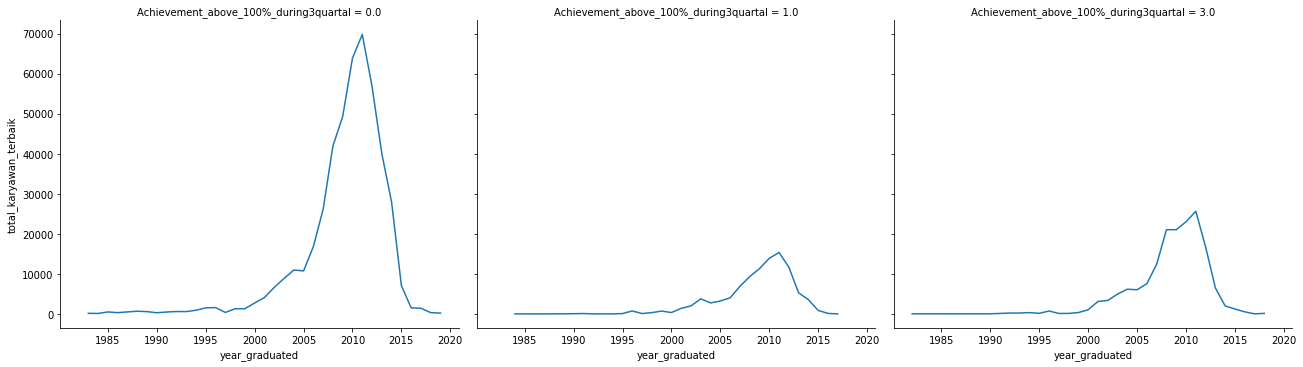

In [ ]:
sns.relplot(data= performa_karyawan, kind= "line",
            x= "year_graduated", y= "total_karyawan_terbaik", col= "Achievement_above_100%_during3quartal", aspect=6/5)
plt.show()

## Melakukan pemodelan menggunakan FBProphet

Setelah melakukan tahapan preprocessing, selanjutnya saya akan melakukan tahapan untuk pemodelan dasar dengan menggunakan fbprophet. Biasanya bagian mendasar untuk memahami konsep time series adalah dapat menguraikan komponen yang mendasarinya. Terdapat cara klasik untuk menguraikan hal tersebut yaitu dengan menggunakan GAM (General Additive Model) atau model aditif. 
Lalu untuk menggunakan fbprophet, langkah pertama yaitu menyiapkan data time series (yang dimana data yang dipakai adalah data train.csv/data_latih) ke dalam format yang telah ditentukan. Maka dari itu saya akan memanfaatkan kolom dari total_performance & total_karyawan_terbaik.

Dalam pemodelannya, kami menggunakan sebuah model yang bernama Baseline. Model Baseline ini adalah sebuah informasi dasar yang dihimpun sebelum suatu sistem/data tersebut dianalisis lebih lanjut. Data inilah yang akan kami gunakan sebagai pembanding agar dapat memperkirakan dampak-dampak apa saja yang terjadi di dalam data time series ini. Maka dari itu ebelum menggunakan library dari FBProphet, kami perlu mempersiapkan/membuat kembali susunan time series kami ke dalam kerangka yang diperlukan.

In [ ]:
# Menambahkan variabel pada DataFrame dan mengganti nama kolom pada variabel DataFrame performa_karyawan
total_performa= performa_karyawan[["year_graduated", "total_karyawan_terbaik"]].rename(
    columns={"year_graduated": "ds", # ds= kolom yang menyatakan waktu
             "total_karyawan_terbaik": "y"}) # y= nilai yang akan kita perkirakan

total_performa.head()

,ds,y
0,1982,116.01
1,1983,228.96
2,1984,200.46
3,1984,87.41
4,1985,580.74


Untuk memasang model Prophet, saya harus mengimport terlebih dahulu dari library fbprophet. Dan untuk menggunakan fbprophet ini juga harus diperhatikan bahwasanya harus menyesuaikan pada saat kita menentukan pengubahan nama kolom (sesuai dengan kolom apa yang ingin dianalisis) menjadi ds dan y (yang disini saya mengubah kolom year_graduated menjadi ds & kolom total_karyawan_terbaik menjadi y).

In [ ]:
from fbprophet import Prophet

model_prophet = Prophet()
model_prophet.fit(total_performa) # DataFrame total_performa didapatkan pada saat langkah untuk mengubah nama kolom menjadi "ds" & "y"

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Setelah sebelumnya mengimport fbprophet pada pengujian ini, saya akan melanjutkan kembali yaitu melakukan tahapan prediksi untuk 1 tahun ke depan dengan memanfaatkan metode dari fbprophet yaitu .make_future_dataFrame dengan memakai perhitungan "M" atau bukan. Jadi 1 tahun= 12 bulan.

In [ ]:
prediksi_karyawan_masa_depan = model_prophet.make_future_dataframe(periods=12, freq= "M") # M = month/bulan, sedangkan periods itu adalah jumlah bulan dalam 1 tahun
prediksi_karyawan_masa_depan.tail()

,ds
45,1970-08-31 00:00:00.000002019
46,1970-09-30 00:00:00.000002019
47,1970-10-31 00:00:00.000002019
48,1970-11-30 00:00:00.000002019
49,1970-12-31 00:00:00.000002019


In [ ]:
prediksi_karyawan_masa_depan["ds"].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                                50
unique                               50
top       1970-08-31 00:00:00.000002019
freq                                  1
first     1970-01-01 00:00:00.000001982
last      1970-12-31 00:00:00.000002019
Name: ds, dtype: object

Setelah melakukan pemodelan dengan prophet pada DataFrame prediksi_karyawan_masa_depan, saya melakukan langkah prediksi kembali agar mendapatkan rentang waktu selama 12 bulan ke depan (mengikuti periode pada DataFrame prediksi_karyawan_masa_depan).

In [ ]:
nilai_prediksi_karyawan = model_prophet.predict(prediksi_karyawan_masa_depan)
nilai_prediksi_karyawan[["ds", "trend", "yearly", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,trend,yearly,yhat,yhat_lower,yhat_upper
45,1970-08-31 00:00:00.000002019,-9050.823284,3582.870037,-5467.953247,-20606.877974,10958.822968
46,1970-09-30 00:00:00.000002019,-9006.197797,-7504.808104,-16511.005901,-31849.676438,-614.451801
47,1970-10-31 00:00:00.000002019,-8960.084794,-14047.233305,-23007.318099,-38961.903768,-7408.973014
48,1970-11-30 00:00:00.000002019,-8915.459308,1556.726243,-7358.733065,-22852.025180,8849.162969
49,1970-12-31 00:00:00.000002019,-8869.346305,1213.125823,-7656.220482,-23641.797881,8461.748708


Output yang dihasilkan pada DataFrame nilai_prediksi_karyawan terdapat ds, yearly, yhat, yhat_lower & yhat_upper yang bisa diartikan sebagai berikut:
1. Ds= kolom yang menyatakan waktu. Yang dimana kolom tersebut adalah year_graduated.
2. Trend = merupakan naik dan turunnya suatu prediksi yang diperoleh dari perubahan dari waktu ke waktu.
3. Yearly = Musim tahunan yang menyatakan tingkat kinerja dari para karyawan.
4. yhat = Nilai prediksi
5. Yhat_lower & yhat_upper = Merupakan range error pada interval data prediksi.

Untuk lebih detailnya saya akan membuatkan sebuah visualisasi dari variabel DataFrame nilai_prediksi_karyawan menggunakan salah satu library yaitu matplotlib. 

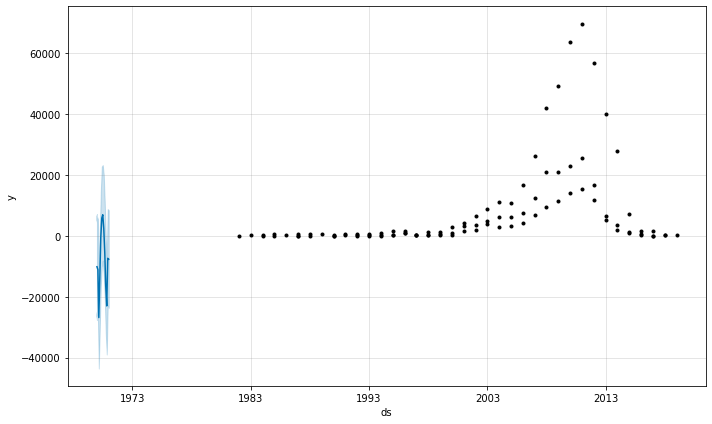

In [ ]:
fig = model_prophet.plot(nilai_prediksi_karyawan)

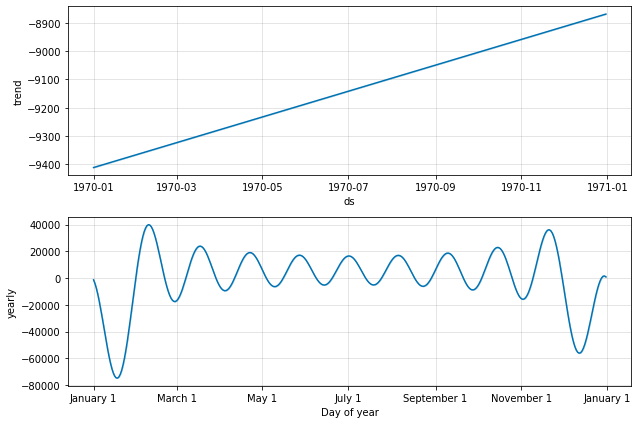

In [ ]:
fig = model_prophet.plot_components(nilai_prediksi_karyawan)

Dari ouput yang dihasilkan, kita menjadi mendapatkan 2 info penting yaitu sebagai berikut:
1. Trend menunjukkan grafik yang naik ke atas sehingga dapat kita simpulkan bahwasanya karyawan selalu rajin untuk masuk ke kantor.
2. Pada yearly (tahunan) menunjukkan bahwa performa pegawai KPI pada awal tahun dan akhir tahun selalu mengalami penurunan performa. Sedangkan pada bulan 1 Maret - 1 November bisa dibilang tidak terlalu mengalami peningkatan maupun penurunan performa dari para pegawai di KPI.

## Menambahkan Regressor
Menambahkan regressor dapat ditambahkan ke bagian liniear dari model dengan menggunakan cara yaitu .add_regressor(). Sebelum memasang model, saya ingin memperkirakan total_performance berdasarkan komponen sebelumnya dan juga total_karyawan_terbaik sebagai regressor.
Nilai regressor harus dikenal secara baik untuk riwayat maupun waktu yang akan datang. Dengan demikian harus berupa sesuatu yang telah mengetahui nilai-nilai masa depan yang telah diprediksi secara terpisah dengan model time series seperti model fbprophet.

In [ ]:
performa_karyawan.head()

,year_graduated,Achievement_above_100%_during3quartal,total_karyawan_terbaik,total_performance
0,1982,3.0,116.01,0.00
1,1983,0.0,228.96,0.00
2,1984,0.0,200.46,148.89
3,1984,1.0,87.41,0.00
4,1985,0.0,580.74,147.37


### Regressor dengan total_karyawan_terbaik
Namun dilangkah regressor yang pertama ini saya akan memperkirakan dari total_karyawan_terbaik terlebih dahulu.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


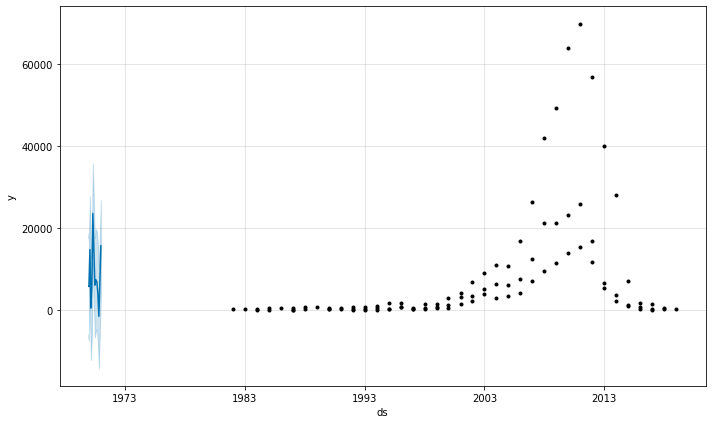

In [ ]:
# fitting model
performa_karyawan = Prophet(
    n_changepoints = 20, # trend flexibility
    changepoint_range = 0.9, # trend flexibility
    changepoint_prior_scale = 0.25, # trend flexibility
    weekly_seasonality = 5, # seasonality fourier order
    yearly_seasonality = False, # remove seasonality
    )
## add monthly seasonality
performa_karyawan.add_seasonality(name= "monthly", period = 12, fourier_order = 5)
performa_karyawan.fit(total_performa)

# forecasting
future = performa_karyawan.make_future_dataframe(periods=12, freq='M')
forecast_total_karyawan_terbaik = performa_karyawan.predict(future)

# visualize
fig = performa_karyawan.plot(forecast_total_karyawan_terbaik)

Lalu script di bawah ini ini akan menunjukkan perkiraan jumlah total karyawan selama 12 bulan terakhir (1 tahun).

In [ ]:
forecasted_total_karyawan_terbaik = forecast_total_karyawan_terbaik[['ds', 'yhat']].tail(12) \
                        .rename(columns={'yhat': 'total_karyawan_terbaik'})
forecasted_total_karyawan_terbaik.head()

,ds,total_karyawan_terbaik
38,1970-01-31 00:00:00.000002019,14691.417807
39,1970-02-28 00:00:00.000002019,450.223354
40,1970-03-31 00:00:00.000002019,6081.703607
41,1970-04-30 00:00:00.000002019,23510.449998
42,1970-05-31 00:00:00.000002019,14722.609655


In [ ]:
# Disisi lain saya juga akan membuat DataFrame baru yang akan saya gunakan sebagai jumlah total aktual yang akan saya gunakan untuk model pelatihan
aktual_prediksi_pegawai = total_performa.rename(columns={"y": "total_karyawan_terbaik"})
aktual_prediksi_pegawai

,ds,total_karyawan_terbaik
0,1982,116.01
1,1983,228.96
2,1984,200.46
3,1984,87.41
4,1985,580.74
...,...,...
94,2017,86.83
95,2017,106.18
96,2018,397.32
97,2018,209.47


Sekarang saya harus menggabungkan total_kaaryawan_terbaik sebagai nilai regressor dari total_performance:
1. 99 observasi pertama: nilai aktual dari total_karyawan_terbaik.
2. 365 observasi kedua: nilai perkiraan dari total_karyawan_terbaik.

In [ ]:
prediksi_regressor = pd.concat([aktual_prediksi_pegawai, forecasted_total_karyawan_terbaik])
prediksi_regressor

,ds,total_karyawan_terbaik
0,1982,116.010000
1,1983,228.960000
2,1984,200.460000
3,1984,87.410000
4,1985,580.740000
...,...,...
45,1970-08-31 00:00:00.000002019,6823.493843
46,1970-09-30 00:00:00.000002019,3976.691697
47,1970-10-31 00:00:00.000002019,-1549.109553
48,1970-11-30 00:00:00.000002019,6763.427641


Karena dalam prediksi_regressor masih terdapat banyaknya data yg kosong (yang ditandai dengan NaN), maka kami akan membuat data yg kosong tersebut menjadi data yang dihasilkan dari perhitungan mean.

### Evaluasi Metrics Menggunakan AUC (Area Under ROC Curve)
Setelah melakukan tahapan dalam visualisasi pada DataFrame nilai_prediksi_karyawan dengan bantuan model dari fbprophet, kini saya akan melakukan tahapan dalam pemisahan data menjadi 2 bagian menggunakan library dari sklearn yaitu train_test_split. Dan 2 data yang akan dipisahkan akan saya beri nama yaitu sebagai berikut:
1. Data train yang digunakan untuk melatih model deret waktu yang telah saya buat untuk mendapatkan pola yang mendasari seperti tren dan perkembangan dari waktu ke waktu.
2. Data test yang bertujuan untuk melakukan validasi silang dan melihat performa model pada data yang tidak terlihat. Tujuannya sangat jelas agar saya dapat memperoleh gambaran sekilas tentang jenis kesalahan yang akan kita harapkan untuk model tersebut.

Namun untuk memisahkan kedua data tersebut, saya akan menggunakan variabel DataFrame yaitu total_performa. Selain itu nilai True Positive Rate akan dibandingkan dengan nilai False Positive Rate dengan threshold yang berbeda karena kami menggunakan metrics auc.

In [ ]:
total_performa.head()

,ds,y
0,1982,116.01
1,1983,228.96
2,1984,200.46
3,1984,87.41
4,1985,580.74


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning:

Label not 0 is present in all training examples.

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning:

Label not 1 is present in all training examples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



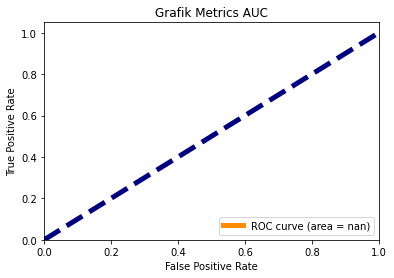

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

x = total_performa["y"]

y = total_performa["ds"]

# Binarize the output
y = label_binarize(y, classes=[2,0])
n_classes = y.shape[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 1)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state= 1))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 5
plt.plot(fpr[1], tpr[1], color="darkorange",
         lw=lw, label="ROC curve (area = %0.8f)" % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Grafik Metrics AUC")
plt.legend(loc="lower right")
plt.show()

### Langkah Prediksi Untuk File Test.csv

In [ ]:
data_uji.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0


In [ ]:
data_uji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              6000 non-null   object 
 1   job_duration_in_current_job_level      6000 non-null   float64
 2   person_level                           6000 non-null   object 
 3   job_duration_in_current_person_level   6000 non-null   float64
 4   job_duration_in_current_branch         6000 non-null   float64
 5   Employee_type                          6000 non-null   object 
 6   gender                                 6000 non-null   int64  
 7   age                                    6000 non-null   int64  
 8   marital_status_maried(Y/N)             6000 non-null   object 
 9   number_of_dependences                  6000 non-null   int64  
 10  Education_level                        6000 non-null   object 
 11  GPA 

In [ ]:
data_uji["Best_Performance"] = data_uji["gender"] / data_uji["job_duration_from_training"]
data_uji.head(60000)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best_Performance
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0,0.166667
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0,1.000000
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0,0.500000
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0,0.666667
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,level_4,3.01,2015,2,2,2,0,4,0,58.60,0.0,1.000000
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,level_4,3.56,2011,5,3,2,7,3,0,90.64,3.0,0.400000
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,level_4,3.59,2013,3,2,3,0,16,0,13.02,0.0,0.666667
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,level_4,2.93,2003,14,7,6,8,2,0,82.26,0.0,0.142857


Sama pada langkah yang telah kami lakukan pada tahapan awal untuk file train.csv, kami membuat sebuah kolom baru yang didapatkan dari hasil perhitungan pembagian antara kolom gender dan kolom job_duration_from_training. Tapi dikarenakan pada DataFrame data_uji masih terdapat banyaknya kolom maka kami akan menghapus beberapa supaya lebih memudahkan dalam melakukan tahapan prediksi.

In [ ]:
# Menghapus beberapa kolom yang terdapat pada DataFrame data_uji
data_uji = data_uji.drop(["job_level", "job_duration_in_current_job_level", "person_level", "job_duration_in_current_person_level", "job_duration_in_current_branch","Employee_type","age", 
                            "marital_status_maried(Y/N)", "number_of_dependences", "Education_level", "GPA", "year_graduated", "job_duration_from_training", "branch_rotation", "job_rotation", 
                              "assign_of_otherposition", "annual leave", "sick_leaves", "Last_achievement_%", "Achievement_above_100%_during3quartal"], axis = 1)
data_uji.head()

,gender,Best_Performance
0,1,0.166667
1,2,1.000000
2,2,0.500000
3,2,0.666667
4,1,0.200000


In [ ]:
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(data_uji)

,gender,Best_Performance
0,1,0.166667
1,2,1.000000
2,2,0.500000
3,2,0.666667
4,1,0.200000
...,...,...
5995,2,1.000000
5996,2,0.400000
5997,2,0.666667
5998,2,0.142857


Bisa dilihat pada output diatas yang hanya menyisakan kolom Last_achievement_% & Best_Performance. Maka dari itu kami akan menentukan kolom mana yang menjadi variabel independen dan yang mana yang akan menjadi variabel dependen.

In [ ]:
x = data_uji.drop(["gender"], axis= 1)

y = data_uji["Best_Performance"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 1)

In [ ]:
# Melakukan penskalaan fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn import preprocessing
from sklearn.base import TransformerMixin # gives fit_transform method for free

class MyLabelBinarizer(TransformerMixin):
 def __init__(self, *x_train, **y_train):
    self.encoder = LabelBinarizer(*x_train, **y_train)

def fit(self, x, y= 3):
  self.encoder.fit(x)
  return self
  
def transform(self, x, y= 0):
  return self.encoder.transform(x)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

y_pred = 12345
y_pred = str(y_pred)
sum(int(x) for x in y_pred)
sum(map(int, y_pred))

mlb = MultiLabelBinarizer()
y_pred_transformed = mlb.fit(y_pred).transform(y_pred)
print(y_pred_transformed)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix
y_test = [4, 3, 4, 1, 5]
y_pred = [3, 2, 4, 1, 3]

confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.40      0.30      0.33         5
weighted avg       0.60      0.40      0.47         5



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

